In [2]:
using AutomotiveDrivingModels
using AutoViz

In [6]:
function simulate!(scene::Scene, models::Dict{Int, DriverModel},
        roadway::Roadway, rec::SceneRecord, T::Float64)
    actions = Array(DriveAction, length(scene))
    # simulate for T seconds in rec.timestep-length substeps
    for t in 0:rec.timestep:(T - rec.timestep)
        get_actions!(actions, scene, roadway, models)
        tick!(scene, roadway, actions, models)
        update!(rec, scene)
    end
    return rec
end

LoadError: LoadError: error in method definition: function AutomotiveDrivingModels.simulate! must be explicitly imported to be extended
while loading In[6], in expression starting on line 1

In [4]:
# add three vehicles where each is approaching the one in front 
# faster than the front one is moving away
context = IntegratedContinuous(.1, 1)
num_veh = 3

# one lane roadway
roadway = gen_straight_roadway(1, 30.)
scene = Scene(num_veh)

models = Dict{Int, DriverModel}()

# 1: first vehicle, moving the fastest
mlon = StaticLongitudinalDriver(2.)
models[1] = Tim2DDriver(context, mlon = mlon)
road_idx = RoadIndex(proj(VecSE2(0.0, 0.0, 0.0), roadway))
base_speed = 2.
veh_state = VehicleState(Frenet(road_idx, roadway), roadway, base_speed)
veh_def = VehicleDef(1, AgentClass.CAR, 5., 2.)
push!(scene, Vehicle(veh_state, veh_def))

# 2: second vehicle, in the middle, moving at intermediate speed
mlon = StaticLongitudinalDriver(1.)
models[2] = Tim2DDriver(context, mlon = mlon)
base_speed = 1.
road_pos = 10.
veh_state = VehicleState(Frenet(road_idx, roadway), roadway, base_speed)
veh_state = move_along(veh_state, roadway, road_pos)
veh_def = VehicleDef(2, AgentClass.CAR, 5., 2.)
push!(scene, Vehicle(veh_state, veh_def))

# 3: thrid vehicle, in the front, not moving
mlon = StaticLongitudinalDriver(0.)
models[3] = Tim2DDriver(context, mlon = mlon)
base_speed = 0.
road_pos = 20.
veh_state = VehicleState(Frenet(road_idx, roadway), roadway, base_speed)
veh_state = move_along(veh_state, roadway, road_pos)
veh_def = VehicleDef(3, AgentClass.CAR, 5., 2.)
push!(scene, Vehicle(veh_state, veh_def))

# simulate the scene for 1 second
rec = SceneRecord(500, .1, num_veh)
T = 1.
# simulate here because some features need priming
simulate!(scene, models, roadway, rec, T)

LoadError: LoadError: MethodError: no method matching simulate!(::AutomotiveDrivingModels.AutoCore.Scene, ::Dict{Int64,AutomotiveDrivingModels.DriverModel}, ::AutomotiveDrivingModels.AutoCore.Roadway, ::AutomotiveDrivingModels.AutoCore.SceneRecord, ::Float64)
Closest candidates are:
  simulate!(!Matched::AutomotiveDrivingModels.AutoCore.SceneRecord, !Matched::AutomotiveDrivingModels.DriverModel{DriveAction,ActionContext}, !Matched::Int64, !Matched::AutomotiveDrivingModels.AutoCore.Trajdata, ::Float64, !Matched::Float64; prime_history, scene) at /Users/wulfebw/.julia/v0.5/AutomotiveDrivingModels/src/simulation/simulation.jl:81
while loading In[4], in expression starting on line 45

In [ ]:
render(scene, roadway, cam=FitToContentCamera())

In [11]:
roadway = gen_straight_roadway(3, 50.0, lane_width=1.0)
    rec = SceneRecord(1, 0.1, 5)
    update!(rec, Scene([
            Vehicle(VehicleState(VecSE2( 0.0,0.0,0.0), roadway, 10.0), VehicleDef(1, AgentClass.CAR, 5.0, 2.0)),
            Vehicle(VehicleState(VecSE2(10.0,0.0,0.0), roadway, 10.0), VehicleDef(2, AgentClass.CAR, 5.0, 2.0)),
        ]))

SceneRecord(nscenes=1)

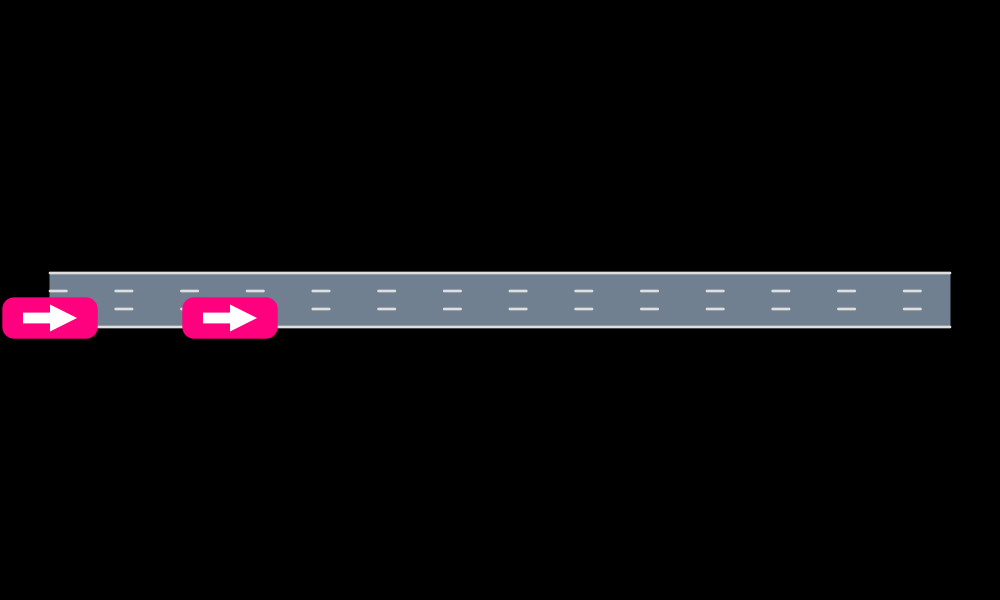

In [12]:
render(get_scene(rec,0), roadway, cam=FitToContentCamera())